# Regression over housing details California -    

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

%matplotlib inline 
import matplotlib as mlp 
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf 
from tensorflow import keras 

In [3]:
np.random.seed(42) 
tf.random.set_seed(42) 

Loading housing dataset -  

In [4]:
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing() 

In [5]:
housing.feature_names 

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
x_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) 
X_train, X_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)   

print(f"Train_full size :\n{x_train_full.shape}\n{y_train_full.shape}\nTest size : \n{X_test.shape}\n{y_test.shape}") 
print(f"\nTrain size :\n{X_train.shape}\n{y_train.shape}\nValid^n size : \n{X_valid.shape}\n{y_valid.shape}") 

Train_full size :
(15480, 8)
(15480,)
Test size : 
(5160, 8)
(5160,)

Train size :
(11610, 8)
(11610,)
Valid^n size : 
(3870, 8)
(3870,)


In [7]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test) 

In [8]:
X_train 

array([[-0.19397883, -1.07781319, -0.94338545, ..., -0.57291624,
         0.92926047, -1.42215523],
       [ 0.75198318, -1.868895  ,  0.40547793, ...,  0.20516532,
        -0.91654738,  1.09666969],
       [-0.41469108,  0.02970134,  0.81808819, ..., -0.29983271,
         1.30872858, -1.697027  ],
       ...,
       [-1.22332336,  0.50435042, -0.51600328, ...,  0.1344908 ,
        -0.71978613,  1.14664638],
       [-0.93556989,  1.8491895 , -0.10878451, ..., -0.01354498,
         0.52168361, -0.10277075],
       [ 0.89585991,  0.1879177 ,  0.29947528, ..., -0.17823425,
         1.12133692, -1.30720885]])

In [9]:
y_train 

array([1.442, 1.687, 1.621, ..., 0.68 , 0.613, 1.97 ])

In [10]:
X_valid  

array([[-0.72894678,  0.42524224, -0.72520018, ...,  0.76884409,
        -0.89312342,  0.86177927],
       [-0.53253697,  1.61186495, -0.07501671, ...,  0.22981129,
         0.96673881, -1.43714823],
       [-1.12428044, -0.36583956, -0.83039438, ..., -0.37482146,
        -1.35223299,  1.26159275],
       ...,
       [-0.38169423, -0.2076232 , -0.46608538, ...,  0.05940227,
        -0.64482947,  0.43697745],
       [-0.75078755,  0.50435042, -0.67205695, ..., -0.3343433 ,
        -1.15078695,  1.10166736],
       [-0.07665671,  0.10880952, -0.42690329, ..., -0.15910745,
        -0.87438425,  0.8567816 ]])

In [11]:
y_valid 

array([1.625, 2.25 , 1.568, ..., 1.794, 1.979, 1.86 ])

In [12]:
X_test 

array([[-1.15780104, -0.28673138, -0.49550877, ...,  0.38899735,
         0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973, ..., -0.11818174,
        -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788, ..., -0.67694905,
         1.00890193, -1.4271529 ],
       ...,
       [-0.90351581,  0.66256679, -0.8562583 , ...,  0.68837768,
        -0.76194926,  0.66187253],
       [ 1.56873373, -1.78978682,  0.75535703, ..., -0.18226735,
         1.34152212, -0.73747465],
       [ 1.43527981,  0.58345861,  0.10928062, ..., -0.17819366,
        -0.82285155,  0.59190517]])

In [13]:
y_test 

array([0.477  , 0.458  , 5.00001, ..., 1.177  , 2.631  , 4.815  ])

# Keras neural network model -  

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]), 
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

model.summary() 

d:\Machine_Learning_PY\virtl_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,231 (4.81 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 0 (0.00 B)

Model comparision and showcase -  

In [15]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae']) 


In [16]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) 
print(f"Model parameters : {model_history.params}") 
print(f"Model history : \n{model_history.history}") 

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9408 - mae: 1.3104 - val_loss: 0.9654 - val_mae: 0.7143
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8643 - mae: 0.7017 - val_loss: 0.6908 - val_mae: 0.6073
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7196 - mae: 0.6250 - val_loss: 0.6193 - val_mae: 0.5703
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6664 - mae: 0.5935 - val_loss: 0.5780 - val_mae: 0.5482
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6255 - mae: 0.5729 - val_loss: 0.5432 - val_mae: 0.5303
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5913 - mae: 0.5562 - val_loss: 0.5148 - val_mae: 0.5157
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5625 - mae: 0.5421 - val_loss: 0.4891 - val_mae: 0.5032
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5377 - mae: 0.5300 - val_loss: 0.4702 - val_mae: 0.4931
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

# Model Performance -  

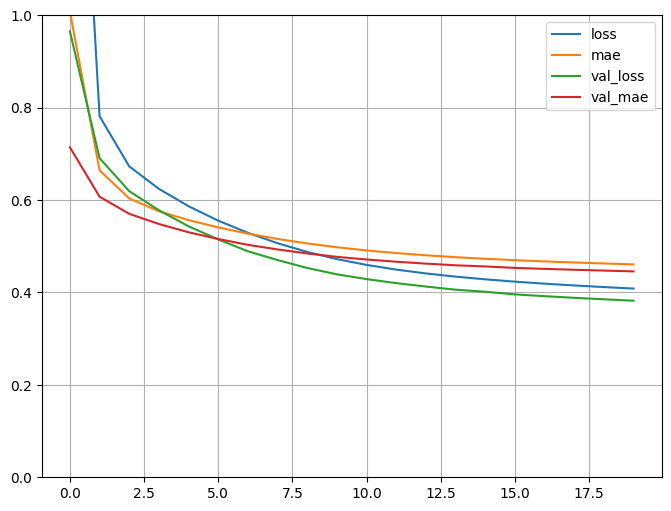

In [17]:
pd.DataFrame(model_history.history).plot(figsize=(8,6))  
plt.grid(True) 
plt.gca().set_ylim(0,1) 
plt.show() 

In [18]:
mae_test = model.evaluate(X_test, y_test) 

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.4122 - mae: 0.4606


In [19]:
X_new = X_test[:3] 
X_new 

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

In [20]:
y_pred = model.predict(X_new) 
print(f"Prediction value = {y_pred}") 
print(f"Test value = {y_test[:3]}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction value = [[0.6476703]
 [1.5923533]
 [3.4554338]]
Test value = [0.477   0.458   5.00001]


# Functional API -  

Some NN models have complex topologies rather than sequential. Some may have multiple input or multiple output.  

In [21]:
tf.keras.backend.clear_session() 
tf.compat.v1.reset_default_graph() 

In [22]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) 
hidden1 = keras.layers.Dense(30, activation='relu')(input_)  
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1) 
concat = keras.layers.concatenate([input_, hidden2]) 
output = keras.layers.Dense(1)(concat) 

model2 = keras.models.Model(inputs=[input_], outputs=[output]) 
model2.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer[0][0… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

New Model performance -  

In [23]:
model2.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['mae']) 

In [24]:
model2_history = model2.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid)) 
print(f"Model_2 parameters : {model2_history.params}") 
print(f"Model_2 history : \n{model2_history.history}") 

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.0433 - mae: 1.5586 - val_loss: 1.0681 - val_mae: 0.6224
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7289 - mae: 0.6254 - val_loss: 0.6430 - val_mae: 0.5828
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6689 - mae: 0.6006 - val_loss: 0.5888 - val_mae: 0.5596
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6302 - mae: 0.5804 - val_loss: 0.5509 - val_mae: 0.5404
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5979 - mae: 0.5635 - val_loss: 0.5203 - val_mae: 0.5237
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5705 - mae: 0.5488 - val_loss: 0.4952 - val_mae: 0.5095
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5471 - mae: 0.5361 - val_loss: 0.4750 - val_mae: 0.4978
Epoch 8/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5270 - mae: 0.5251 - val_loss: 0.4587 - val_mae: 0.4878
Epoch 9/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

In [25]:
mae_test = model2.evaluate(X_test, y_test) 
mae_test 

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.3696 - mae: 0.4296


[0.3704414665699005, 0.43026942014694214]

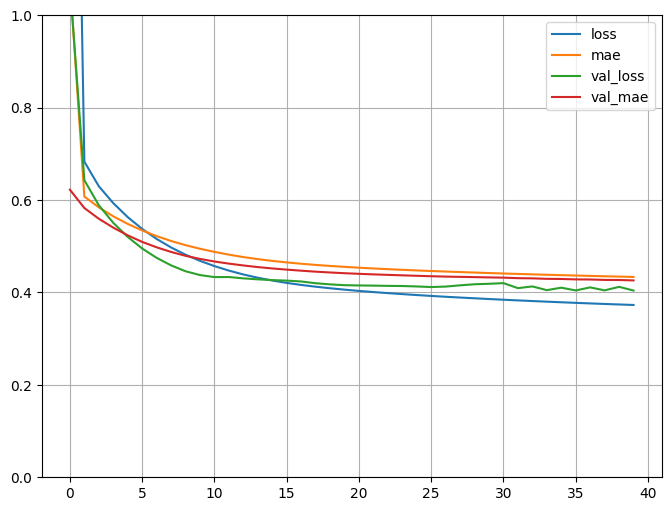

In [26]:
pd.DataFrame(model2_history.history).plot(figsize=(8,6))  
plt.grid(True) 
plt.gca().set_ylim(0,1) 
plt.show() 

# Saving models  

In [27]:
# model.save("sequencial_model.h5") 
# model2.save("func_api_model.h5") 

model.save("sequencial_model.keras") 
model2.save("func_api_model.keras") 